## Gradient descent methods
####
introduction

#### 1.1 A simple quadratic function
Let's start by numerically optimize a simple two-dimensional function $ f(x) = x^2_1+x^2_2 $. Since it's a convex function (we can notice it by the positive sign of the coefficient of x^2) it will have a single minimum, found where $ \nabla f(x) = 0$. Let's now find where the gradient is equal to zero.



$
\nabla f(x)= \Big( \frac{\partial f}{\partial x_{1}}, \frac{\partial f}{\partial x_{2}}\Big)^T =(2x_{1},2x_{2})^T \\
\nabla f(x)=0\\
\frac{\partial f}{\partial x_{1} = 2x_1 = 0, \ x_1 = 0 \\
$
$
\frac{\partial f}{\partial x_{2} = 2x_2 = 0, \ x_2 = 0 \\
$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

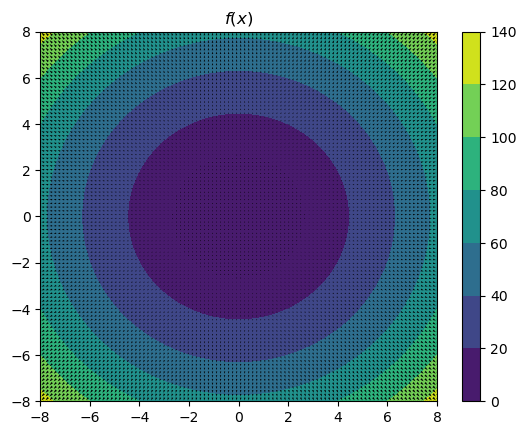

In [9]:
# Countour plot of fA(x)
x = np.linspace(-8.0, 8.0, 100)
y = np.linspace(-8.0, 8.0, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('$f(x)$')
u = 2*X
v = 2*Y

plt.quiver(x,y,u,v)
plt.show()

#####
Here we have plotted the contour of the gradient. This means that the slope is small where the color is dark and as the color gets brighter, the slope increases. We can see that the function f(x) is convex even from this plot

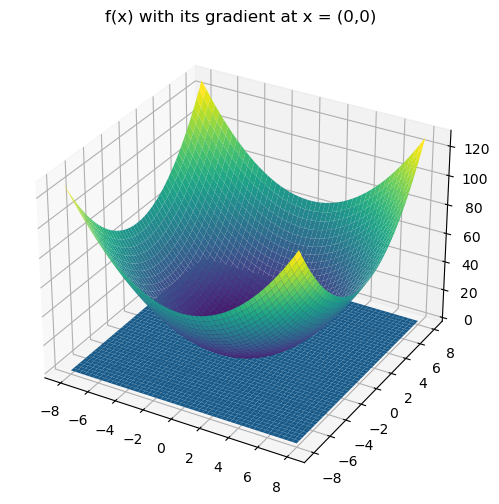

In [5]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-8,8,50)
x2=np.linspace(-8,8,50)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)
eq = 0*X+0*Y

ax.plot_surface(X, Y, eq)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with its gradient at x = (0,0)')
plt.show()

#####
This is the plot of our function f(x). We can clearly see that is convex and it's minimum is in the point(0,0)

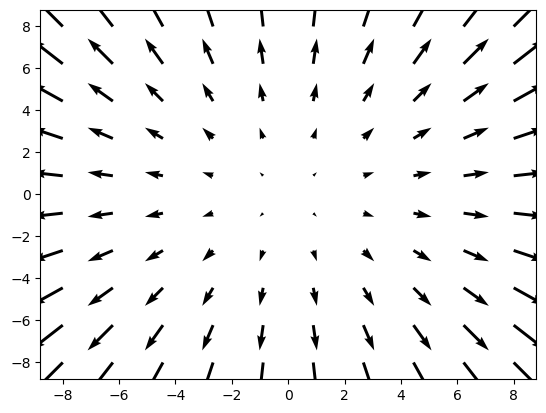

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-8,8,10),np.linspace(-8,8,10))

u = 2*x
v = 2*y

plt.quiver(x,y,u,v)
plt.show()

####
In this Plot we are seeing how the arrows get bigger as the slope of the gradient increases. If we want to perform a gradient descent, we will go in the shortest opposite direction of this arrows to get to the minimum

In [45]:
def grad(x,y):
    return np.array([2*x,2*y])

def gradient_descent(start, gradient, learn_rate, max_iter):
    steps_x = [] # history tracking
    steps_y = [] # history tracking
    x = start

    for _ in range(max_iter):
        diff = learn_rate* gradient(x[0], x[1])
        x = x - diff
        steps_x.append(x[0]) # history tracing
        steps_y.append(x[1]) # history tracing

    return steps_x, steps_y, x

steps_x, steps_y, x= gradient_descent((10,10), grad, 0.1, 100 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X1 = np.array(steps_x)
Y1 = np.array(steps_y)
Z1 = np.array(steps_z)


print( "The last point to which it converged is : ", X1[-1],Y1[-1], Z1[-1])


The last point to which it converged is :  2.0370359763344878e-09 2.0370359763344878e-09 8.299031137761999e-18


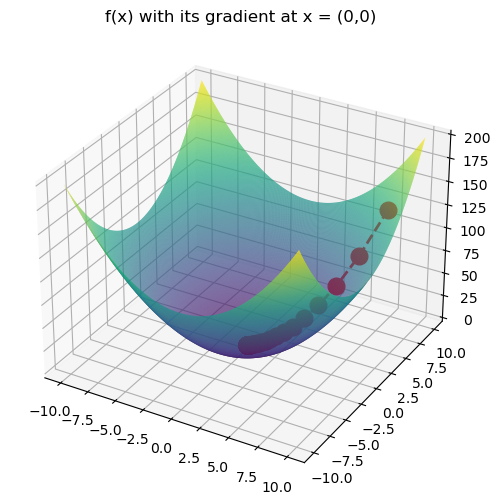

In [46]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-10,10,500)
x2=np.linspace(-10,10,500)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with its gradient at x = (0,0)')

ax.plot(X1,Y1,Z1, color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.show()

This is the 3d graph that shows how the gradient descent algorithm performs

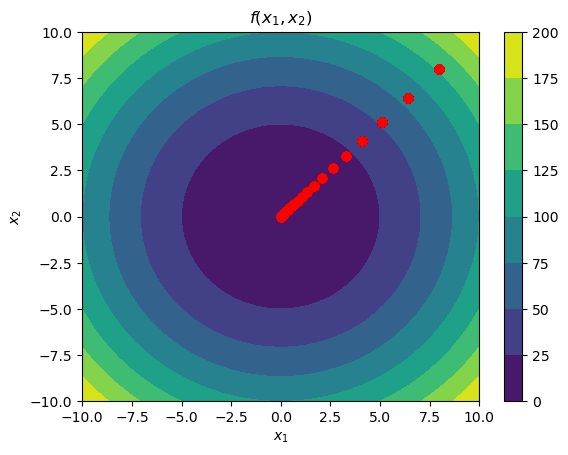

In [30]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

lines_x = [X1 for x in range(len(X1))]
lines_y = [Y1 for x in range(len(Y1))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(Y1)):
    if i == 0:
        plt.scatter(X1, Y1, color='orange')
        plt.plot()
    else:
        plt.scatter(X1, Y1, color='r')
plt.show()

# As extra, try stocastic gradient descent.

The contour graph on top is the path taken by the gradient descent algorithm when it starts from (10,10). Here we can clearly see how the line that descents is always perpendicular to the gradient line

Now we will start from a much further away. Let's say (75, 60) and see how our algorithm performs

In [44]:
steps_x, steps_y, x= gradient_descent((75,60), grad, 0.1, 100 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X2 = np.array(steps_x)
Y2 = np.array(steps_y)
Z2 = np.array(steps_z)

print( "The last point to which it converged is : ", X2[-1],Y2[-1], Z2[-1])

The last point to which it converged is :  1.527776982250866e-08 1.2222215858006927e-08 3.8279281122927223e-16


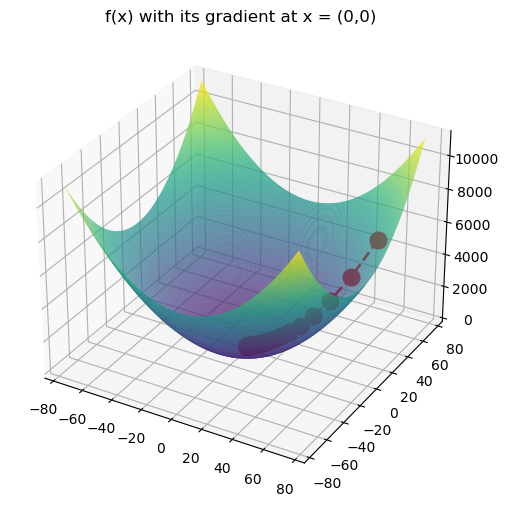

In [36]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-75,75,400)
x2=np.linspace(-75,75,400)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with its gradient at x = (0,0)')

ax.plot(X2,Y2,Z2, color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.show()

This is again, the 3d plot of our function with the points through which gradient descent algorithm passes to get to the minimum

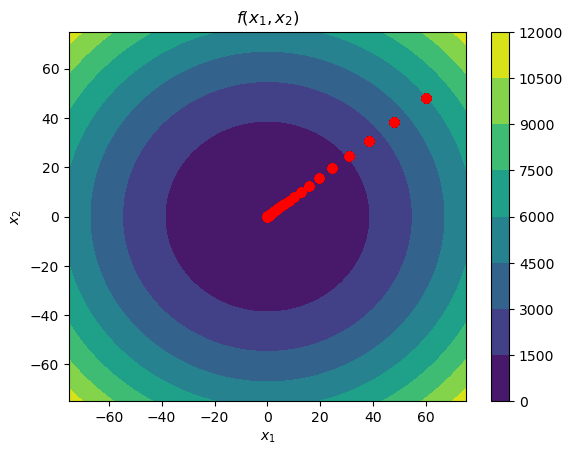

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of fC(x)
x1 = np.linspace(-75, 75, 100)
x2 = np.linspace(-75, 75, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

lines_x = [X2 for x in range(len(X2))]
lines_y = [Y2 for x in range(len(Y2))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(Y1)):
    if i == 0:
        plt.scatter(X2, Y2, color='orange')
        plt.plot()
    else:
        plt.scatter(X2, Y2, color='r')
plt.show()

This is the contour plot and the points through which the descent algorithm passed

Now we will use just 20 iterations for the same point (75,60). See what is the difference.

The last point to which it converged is :  0.8646911284551354 0.6917529027641083 1.2262128261115852


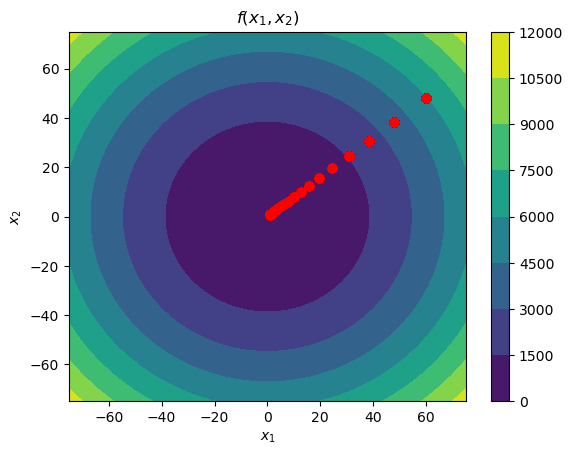

In [49]:
import numpy as np
import matplotlib.pyplot as plt

steps_x, steps_y, x= gradient_descent((75,60), grad, 0.1, 20 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X3 = np.array(steps_x)
Y3 = np.array(steps_y)
Z3 = np.array(steps_z)

print( "The last point to which it converged is : ", X3[-1],Y3[-1], Z3[-1])



# Countour plot of fC(x)
x1 = np.linspace(-75, 75, 100)
x2 = np.linspace(-75, 75, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

lines_x = [X3 for x in range(len(X2))]
lines_y = [Y3 for x in range(len(Y2))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(Y1)):
    if i == 0:
        plt.scatter(X3, Y3, color='orange')
        plt.plot()
    else:
        plt.scatter(X3, Y3, color='r')
plt.show()

So, by changing the number of iterations used we can clearly see that the descent algorithm no longer converges to the minimum. The number of iterations was to small.

Now, we will change $\alpha$ to 1. See how it performs. We will use the starting point (75,60) so that we can compare the results.

In [56]:
steps_x, steps_y, x= gradient_descent((75,60), grad, 1, 100 )
steps_z = []

for pair in zip(steps_x, steps_y):
    steps_z.append(f(pair[0], pair[1]))

X4 = np.array(steps_x)
Y4 = np.array(steps_y)
Z4 = np.array(steps_z)

print( "The last point to which it converged is : ", X4[-1],Y4[-1], Z4[-1])

The last point to which it converged is :  75 60 9225


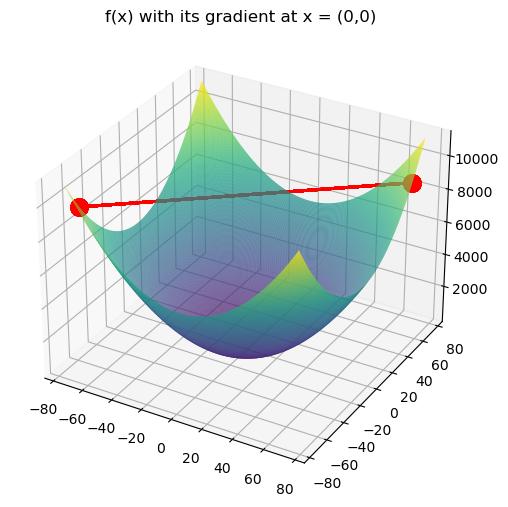

In [57]:

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-75,75,400)
x2=np.linspace(-75,75,400)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with its gradient at x = (0,0)')

ax.plot(X4,Y4,Z4, color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.show()

By using $\alpha$ = 1 there was absolutely no convergence what so ever. The algorithm just gone back and forward between the 2 points. We can see that the $\alpha$ is too big.

#### 1.2 A function with multiple minima
Let's now analyze the function $ f(x_1, x_2) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4) + x_1x_2+x_2^2(-4+4x_2^2) $

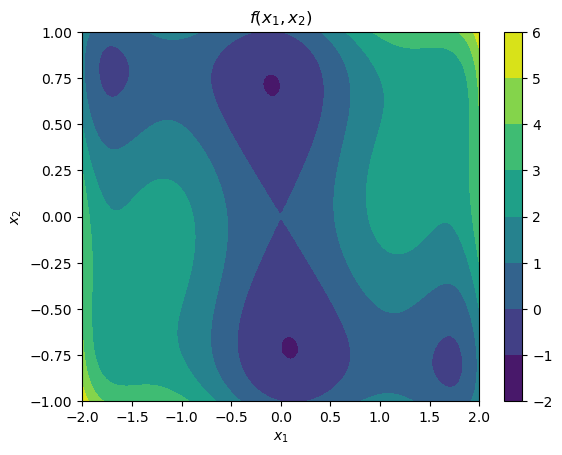

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()

# As extra, try stocastic gradient descent.

Looking at the contour plot, we can guess that the two most frequent minima that will be found are the ones in the center of the plot, although it will depend on where we start, if for example our $x^0$ will be close to the bottom-right corner or top-left one, the found minima will probably be a local one, and not the global ones. Now we will use the simple gradient descent with 100 iterations to illustrate different paths of the algorithm.

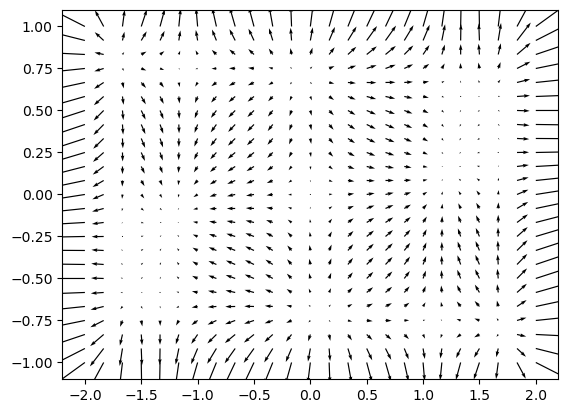

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-2,2,25),np.linspace(-1,1,25))

u = 8*x-8.4*x**3+2*x**5+y
v = x-8*y+16*y**3

plt.quiver(x,y,u,v)
plt.show()


In [21]:
def f(x1, x2):
    return x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 

def gradf(fxy):
    return np.array([8*fxy[0]-8.4*fxy[0]**3+2*fxy[0]**5+fxy[1], fxy[0]-8*fxy[1]+16*fxy[1]**3])

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)

def grad_descent(x1, x2, alpha, iter):
    pair = np.array([x1, x2])
    points = [[x1, x2]]
    for i in range(iter):
        pair = pair - alpha*gradf(pair) 
        points.append([pair[0], pair[1]])
    return points

101


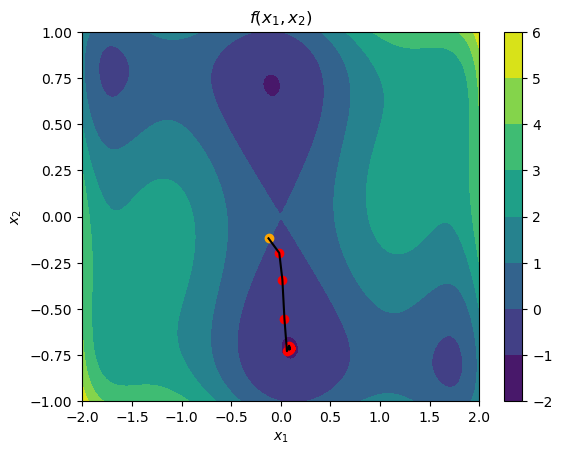

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
points = grad_descent(x01, x02, 0.1, 100)
lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()

# As extra, try stocastic gradient descent.

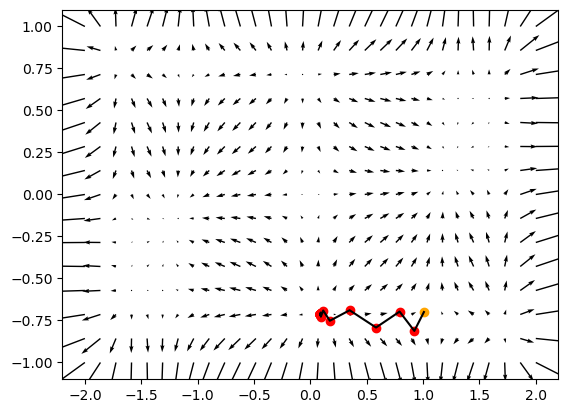

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-2,2,30),np.linspace(-1,1,15))

u = 8*x-8.4*x**3+2*x**5+y
v = x-8*y+16*y**3

plt.quiver(x,y,u,v)
x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
points = grad_descent(x01, x02, 0.1, 100)
lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# function definition
def fxz(X,Y):
    Z = []
    for x in range(len(X)):
        Z.append([])
        for y in range(len(X[0])):
          Z[-1].append(function(X[x][y], Y[x][y]))            
    return Z

def function(x1,x2):
  return x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2)

# Grid for plotting in the search space
x1 = np.linspace(-2, 2,40) 
x2 = np.linspace(-1, 1,20) 
X1, X2 = np.meshgrid(x1, x2)
Z = fxz(X1,X2)

# plotting layout
fig = go.Figure(data=[go.Surface(x=X1, y=X2, z = Z)])

#fig = go.figure(data[go.])


fig.update_layout(title='f(x1,x2)', autosize=False,
                  width=700, height=700,
                  margin=dict(l=20, r=20, b=20, t=20))

fig.update_layout(scene = dict(
                    xaxis_title='x1',
                    yaxis_title='x2',
                    zaxis_title='z'),
                    width=500,
                    height=700,
                    margin=dict(r=40, b=40, l=40, t=40))

fig.show()

Now we will try a different approach,slightly more compliacted than the previous one. The advantage of using backtracking algorithms is that we can adjust the step size while executing the gradient descent, the new algorithm will perform two checks for each iteration. 

(a) the first one will check if the convergence criteria is statisfied, if the proposed value of $\alpha^k$ reduces the value of the function evaluated at $x^k$, where k is the iteration number
(b) if the first point is not satisfied we have to update $ \alpha^k = \frac{\alpha^k}{2}$ and then we repeat the first check.

In [10]:
import numpy as np
def function(x):
  return x[0]**2 * (4 - 2.1 * x[0]**2 + (1/3 * x[0]**4)) + x[0] * x[1] + x[1]**2 * (-1 * 4 + 4 * x[1]**2) 

def gradf(fxy):
    return np.array([8*fxy[0]-8.4*fxy[0]**3+2*fxy[0]**5+fxy[1], fxy[0]-8*fxy[1]+16*fxy[1]**3])

def back_prop(x, points,alpha = 1):
    if function(x-alpha *gradf(x)) < function(x):
        points.append(x)
        x = x-alpha *gradf(x)
        if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.00001:
            points.append(x)
            return [len(points)-1, points]
        else:
            res = back_prop(x, points, 1)
    else:
        alpha = alpha / 2
        res = back_prop(x, points,alpha)
    return res

itera, points = back_prop(np.array([np.random.uniform(-2, 2),np.random.uniform(-1, 1)]), [])
print(itera, points)

10 [array([-0.86951184,  0.92341756]), array([-0.77547396,  0.65207268]), array([-0.50105556,  0.84655859]), array([-0.23000752,  0.54235732]), array([-0.08041033,  0.79439518]), array([-0.0901274 ,  0.69530445]), array([-0.08890384,  0.7124459 ]), array([-0.08979217,  0.7127594 ]), array([-0.0898229 ,  0.71265083]), array([-0.08984083,  0.71265985]), array([-0.08984162,  0.71265625])]


## 2 Newton descent method


#### 2.1 
The function that we are going to study now is $ f(X) = 100x_1^2 +x_2^2 $ for $ x \in \R^2, x = (x_1, x_2)^T $. We can notice that this function is convex since the coefficients of $ x_1^2, x_2^2 $ are positive, therefore we will only have one minimum.
Now we will be plotting the function




In [15]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# function definition
def fxz(X,Y):
    Z = []
    for x in range(len(X)):
        Z.append([])
        for y in range(len(X[0])):
          Z[-1].append(function_2(X[x][y], Y[x][y]))
    return Z

def function_2(x1,x2):
  return 100*x1**2 + x2**2

# Grid for plotting in the search space
x1 = np.linspace(-2, 2,40)
x2 = np.linspace(-1, 1,20)
X1, X2 = np.meshgrid(x1, x2)
Z = fxz(X1,X2)

# plotting layout
fig = go.Figure(data=[go.Surface(x=X1, y=X2, z = Z)])

#fig = go.figure(data[go.])


fig.update_layout(title='f(x1,x2)', autosize=False,
                  width=700, height=700,
                  margin=dict(l=20, r=20, b=20, t=20))

fig.update_layout(scene = dict(
                    xaxis_title='x1',
                    yaxis_title='x2',
                    zaxis_title='z'),
                    width=500,
                    height=700,
                    margin=dict(r=40, b=40, l=40, t=40))

fig.show()

In [2]:
import numpy as np


def function_2(x):
  return 100*x[0]**2 + x[1]**2

def gradf_2(fxy):
    return np.array([200*fxy[0], 2*fxy[1]])


def gradient_descent_21(x, points,alpha = 1):
    if function_2(x-alpha *gradf_2(x)) < function_2(x):
        points.append(x)
        x = x-alpha *gradf_2(x)
        if np.sqrt(gradf_2(x)[0]**2+gradf_2(x)[1]**2) < 0.00001:
            points.append(x)
            return [len(points)-1, points]
        else:
            res = gradient_descent_21(x, points, 1)
    else:
        alpha = alpha / 2
        res = gradient_descent_21(x, points,alpha)
    return res

import sys
sys.setrecursionlimit(1000000000)



The number of different points needed for the algorithm to converge is 667 starting from the point (10,10)

Now, by using the same starting point and the same backtracking algorithm, we will now use the newton method to descent down the gradient.We have set the threshold for the minimum at $10^-5$ .

In [19]:
import numpy as np

def function_2(x):
  return 100*x[0]**2 + x[1]**2

def gradf_2(fxy):
    return np.array([200*fxy[0], 2*fxy[1]])

def newton_21(x, points, alpha = 1, c=[]):
    dxx = 200
    dyy = 1

    hessian = np.array([[dxx, 1],[1, dyy]])
    if function_2(x-alpha*np.matmul(np.linalg.inv(hessian),gradf_2(x))) < function_2(x):
        points.append(x)
        x = x-alpha*np.matmul(np.linalg.inv(hessian),gradf_2(x))
        c.append('g')
        if np.sqrt(gradf_2(x)[0]**2+gradf_2(x)[1]**2) < 0.00001:
            points.append(x)
            return [len(points)-1, points, c]
        else:
            res = newton_21(x, points, 1,c)
    else:
        alpha = alpha / 2
        res = newton_21(x, points,alpha, c)
    return res

itera, points_newton_21, c = newton_21(np.array([10,10]), [])
print(itera, points_newton_21)


7 [array([10, 10]), array([ 0.05025126, -0.05025126]), array([-0.00075756,  0.10126007]), array([ 0.00013197, -0.00088953]), array([-9.60312686e-06,  1.03109908e-03]), array([ 4.03967448e-07, -1.00070943e-05]), array([-1.02603799e-07,  1.05136656e-05]), array([ 1.78838906e-09, -1.04392188e-07])]


There are 7 different points needed by the algorithm to converge when starting from the point (10,10). This is an improvement of over 100 times. As we can see the newton descent algorithm converges much faster than the normal descent algorithm

Now we will be plotting the path taken by the normal Gradient Descent Algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of the newton method
x1 = np.linspace(-11, 11, 100)
x2 = np.linspace(-11, 11, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = 100*x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
itera, points_newton_21 = gradient_descent_21(np.array([10,10]), [])
lines_x = [points_newton_21[x][0] for x in range(len(points_newton_21))]
lines_y = [points_newton_21[x][1] for x in range(len(points_newton_21))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points_newton_21)):
    if i == 0:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='r')
plt.show()

We can see that The algorithm makes the point jump around and then slowly converge to the minimum. At first the big jumps are because of the big $\alpha$. As the $\alpha$ get's smaller, the algorithm won't jump around but it will converge very slowly.


We will now be plotting the path that was taken by the Newton Method

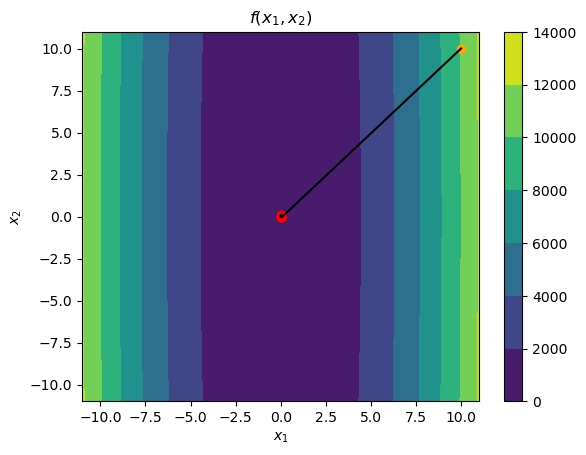

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc

# Countour plot of the newton method
x1 = np.linspace(-11, 11, 100)
x2 = np.linspace(-11, 11, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = 100*x1**2 + x2**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp)
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

x02 = np.random.uniform(-1, 1)
x01 = np.random.uniform(-2, 2)
itera, points_newton_21, c = newton_21(np.array([10,10]), [])
lines_x = [points_newton_21[x][0] for x in range(len(points_newton_21))]
lines_y = [points_newton_21[x][1] for x in range(len(points_newton_21))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points_newton_21)):
    if i == 0:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points_newton_21[i][0], points_newton_21[i][1], color='r')
plt.show()

This graph shows that the newton descent method uses the Taylor Exapnsion given Direction very well as it goes close to the minimum instantly. There are only a few more steps needed for our method to touch the minimum threshold. There's one risk associated with this method: In a function that has more local minimas it is possible for the newton descent to get close rapidly to a minimum point but then it could take a lot of iterations for it to get to the threshold.

#### 2.2 A function with multiple minima


In [ ]:
itera, points = back_prop(np.array([-1.5,-0.25]), [])

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(len(points)):
    if i == 0:
        plt.scatter(points[i][0], points[i][1], color='orange')
        plt.plot()
    else:
        plt.scatter(points[i][0], points[i][1], color='r')
plt.show()

# As extra, try stocastic gradient descent.

Gradient descent with Newton method.
Hessian matrix for our function:
$ Hf(x_1,x_2) =  \begin{pmatrix} 
\frac{\partial^{2} f}{\partial x_{1}^{2}}(x^*) & \frac{\partial^{2} f}{\partial x_{2}x_{1}}(x^*) \\
\frac{\partial^{2} f}{\partial x_{1}x_{2}}(x^*)  & \frac{\partial^{2} f}{\partial x_{2}^{2}}(x^*)  
\end{pmatrix} = \begin{pmatrix} 8-25.2x_1^2+10x_1^4 & 1 \\
1 & -8+48x_2^2 \end{pmatrix}$

Positive definite Hessian check

$(8-25.2x_1^2+10x_1^4 - \lambda)(-8+48x_2^2- \lambda) -1 = 0 \\
\lambda = \frac{\frac{\partial^{2} f}{\partial x_{1}^{2}}+\frac{\partial^{2} f}{\partial x_{2}^{2}} \pm \sqrt{(\frac{\partial^{2} f}{\partial x_{1}^{2}}+\frac{\partial^{2} f}{\partial x_{2}^{2}})^2 -4\frac{\partial^{2} f}{\partial x_{1}^{2}} \frac{\partial^{2} f}{\partial x_{2}^{2}} +4}}{2} $

Gradient descent: $ x^{k+1}=x^k-\alpha^k \nabla f(x^k)$

Newton descent method: $x^{k+1}=x^k+\alpha^k d^k$, where $\nabla^2f(x^k)d^k = -\nabla f(x^k) \\ x^{k+1}=x^k+\alpha^k \nabla^2(x^k)^{-1} \nabla f(x^k) $

In [ ]:
def newton(x, points, alpha = 0.001, c=[]):
    dxx = 8-25.2*x[0]**2+10*x[0]**4
    dyy = -8+48*x[1]**2
    l1 = (dxx + dyy + np.sqrt((dxx+dyy)**2 - 4*dxx*dyy+4))/2
    l2 = (dxx + dyy - np.sqrt((dxx+dyy)**2 - 4*dxx*dyy+4))/2
    if l1 > 0 and l2 > 0:
        
        hessian = np.array([[dxx, 1],[1, dyy]])
        if function(x-alpha*np.matmul(np.linalg.inv(hessian),gradf(x))) < function(x):
            points.append(x)
            x = x-alpha*np.matmul(np.linalg.inv(hessian),gradf(x))
            c.append('g')
            if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.00001:
                points.append(x)
                return [len(points)-1, points, c]
            else:
                res = newton(x, points, 1,c)
        else:
            alpha = alpha / 2
            res = newton(x, points,alpha, c)
    else:
        
        if function(x-alpha *gradf(x)) < function(x):
            points.append(x)
            x = x-alpha *gradf(x)
            c.append('r')
            if np.sqrt(gradf(x)[0]**2+gradf(x)[1]**2) < 0.00001:
                points.append(x)
                return [len(points)-1, points, c]
            else:
                res = newton(x, points, 1, c)
        else:
            alpha = alpha / 2
            res = newton(x, points,alpha,c)
    return res

itera, points, c = newton(np.array([-1.5,-0.25]), [])
print(itera, points,c)
        

In [ ]:
itera, points, c = newton(np.array([-1.5,-0.25]), [])

# Countour plot of fC(x)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = x1**2 * (4 - 2.1 * x1**2 + (1/3 * x1**4)) + x1 * x2 + x2**2 * (-1 * 4 + 4 * x2**2) 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1, x2, Z)
fig.colorbar(cp) 
ax.set_title('$f(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


lines_x = [points[x][0] for x in range(len(points))]
lines_y = [points[x][1] for x in range(len(points))]
plt.plot(lines_x, lines_y, 'black', linestyle="-")
for i in range(1, len(points)):
    plt.scatter(points[i][0], points[i][1], color=c[i-1])
plt.scatter(points[0][0], points[0][1], color='orange')
plt.show()

# As extra, try stocastic gradient descent.